In [ ]:
#Library needed for doing the exploratory analysis

#For dataframe manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #This line allow to display the entire variables in a dataframe 

#For the data vizualisation
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz as sv

#??? 
import os
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [ ]:
#Importing dataset for the study

#SpecAbund table
SpecAbund = pd.read_excel("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/SpecAbund.xlsx")

#For the species data set
df = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/species.csv", sep=';', index_col='Index')

#For the trait data set
df2= pd.read_excel("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/traits_combined_2023.xlsx")

#Load the csv file with the family diversity calculi
Family=pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/Data/Diversty_index.csv", sep=";")
Species_index=pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/Data/Species_diversity.csv", sep=";")

In [ ]:
SpecAbund.head()

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity_intercept,Total_gravity,Keys_Divisions,FKNMS,DryTortugas,BNP,CoralECA,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Abudefduf.saxatilis,Acanthurus.bahianus,Acanthurus.chirurgus,Acanthurus.coeruleus,Acanthostracion.polygonius,Acanthostracion.quadricornis,Acanthurus.sp.,Aluterus.scriptus,Anisotremus.surinamensis,Anisotremus.virginicus,Aulostomus.maculatus,Balistes.capriscus,Bodianus.rufus,Calamus.calamus,Calamus.penna,porgy.species,Cantherhines.pullus,Canthigaster.rostrata,Carangoides.bartholomaei,Caranx.crysos,Caranx.ruber,Cephalopholis.cruentata,Cephalopholis.fulva,Chaetodon.capistratus,Chaetodon.ocellatus,Chaetodon.sedentarius,Chaetodon.striatus,Chromis.cyanea,Chromis.enchrysura,Chromis.insolata,Chromis.multilineata,Chromis.scotti,Clepticus.parrae,Coryphopterus.dicrus,Coryphopterus.glaucofraenum,Coryphopterus.personatus,Cryptotomus.roseus,Diodon.holocanthus,Elacatinus.oceanops,Epinephelus.adscensionis,Epinephelus.morio,Gnatholepis.thompsoni,Gymnothorax.moringa,Haemulon.aurolineatum,Haemulon.carbonarium,Haemulon.chrysargyreum,Haemulon.flavolineatum,Haemulon.macrostomum,Haemulon.melanurum,Haemulon.parra,Haemulon.plumierii,Haemulon.sciurus,Haemulon.sp.,Halichoeres.bivittatus,Halichoeres.cyanocephalus,Halichoeres.garnoti,Halichoeres.maculipinna,Halichoeres.poeyi,Halichoeres.radiatus,Holocentrus.adscensionis,Holacanthus.bermudensis,Holacanthus.ciliaris,Holocentrus.rufus,Holocanthus.sp.,Holacanthus.tricolor,Hypoplectrus.gemma,Hypoplectrus.nigricans,Hypoplectrus.puella,Hypoplectrus.randallorum,Hypoplectrus.unicolor,Kyphosus.sectatrix,Lachnolaimus.maximus,Lactophrys.triqueter,Lutjanus.analis,Lutjanus.apodus,Lutjanus.griseus,Lutjanus.mahogoni,Lutjanus.synagris,Malacoctenus.macropus,Malacanthus.plumieri,Malacoctenus.triangulatus,Microspathodon.chrysurus,Monacanthus.tuckeri,Mulloidichthys.martinicus,Mycteroperca.bonaci,Mycteroperca.phenax,Ocyurus.chrysurus,Opistognathus.aurifrons,Pareques.acuminatus,Parablennius.marmoreus,Pomacanthus.arcuatus,Pomacanthus.paru,Pseudupeneus.maculatus,Ptereleotris.calliura,Pterois.volitans,Scarus.coelestinus,Scarus.coeruleus,Scarus.guacamaia,Scarus.iseri,Scarus.taeniopterus,Scarus.vetula,Scorpaena.plumieri,Scomberomorus.regalis,Serranus.baldwini,Serranus.tabacarius,Serranus.tigrinus,Serranus.tortugarum,Sparisoma.atomarium,Sparisoma.aurofrenatum,Sparisoma.chrysopterum,Sparisoma.radians,Sparisoma.rubripinne,Sparisoma.viride,Sphyraena.barracuda,Sphoeroides.spengleri,Stegastes.adustus,Stegastes.diencaeus,Stegastes.leucostictus,Stegastes.partitus,Stegastes.planifrons,Stegastes.variabilis,Thalassoma.bifasciatum,Urobatis.jamaicensis,Xyrichtys.splendens
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,Marquesas,FKNMS,NaN,NaN,NaN,6483631.0,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.0,36.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0,0,0.0,4.0,0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,16.0,0.0,200.0,76.0,0.0,72.0,36.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,12.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,8.0,0.0,4.0,0,0.0,0,0.0,24.0,0.0,8.0,0.0,4.0,0.0,28.

In [ ]:
SpecAbund2 = SpecAbund.iloc[:, 53:]
SpecAbund2

,no.divers,Abudefduf.saxatilis,Acanthurus.bahianus,Acanthurus.chirurgus,Acanthurus.coeruleus,Acanthostracion.polygonius,Acanthostracion.quadricornis,Acanthurus.sp.,Aluterus.scriptus,Anisotremus.surinamensis,Anisotremus.virginicus,Aulostomus.maculatus,Balistes.capriscus,Bodianus.rufus,Calamus.calamus,Calamus.penna,porgy.species,Cantherhines.pullus,Canthigaster.rostrata,Carangoides.bartholomaei,Caranx.crysos,Caranx.ruber,Cephalopholis.cruentata,Cephalopholis.fulva,Chaetodon.capistratus,Chaetodon.ocellatus,Chaetodon.sedentarius,Chaetodon.striatus,Chromis.cyanea,Chromis.enchrysura,Chromis.insolata,Chromis.multilineata,Chromis.scotti,Clepticus.parrae,Coryphopterus.dicrus,Coryphopterus.glaucofraenum,Coryphopterus.personatus,Cryptotomus.roseus,Diodon.holocanthus,Elacatinus.oceanops,Epinephelus.adscensionis,Epinephelus.morio,Gnatholepis.thompsoni,Gymnothorax.moringa,Haemulon.aurolineatum,Haemulon.carbonarium,Haemulon.chrysargyreum,Haemulon.flavolineatum,Haemulon.macrostomum,Haemulon.melanurum,Haemulon.parra,Haemulon.plumierii,Haemulon.sciurus,Haemulon.sp.,Halichoeres.bivittatus,Halichoeres.cyanocephalus,Halichoeres.garnoti,Halichoeres.maculipinna,Halichoeres.poeyi,Halichoeres.radiatus,Holocentrus.adscensionis,Holacanthus.bermudensis,Holacanthus.ciliaris,Holocentrus.rufus,Holocanthus.sp.,Holacanthus.tricolor,Hypoplectrus.gemma,Hypoplectrus.nigricans,Hypoplectrus.puella,Hypoplectrus.randallorum,Hypoplectrus.unicolor,Kyphosus.sectatrix,Lachnolaimus.maximus,Lactophrys.triqueter,Lutjanus.analis,Lutjanus.apodus,Lutjanus.griseus,Lutjanus.mahogoni,Lutjanus.synagris,Malacoctenus.macropus,Malacanthus.plumieri,Malacoctenus.triangulatus,Microspathodon.chrysurus,Monacanthus.tuckeri,Mulloidichthys.martinicus,Mycteroperca.bonaci,Mycteroperca.phenax,Ocyurus.chrysurus,Opistognathus.aurifrons,Pareques.acuminatus,Parablennius.marmoreus,Pomacanthus.arcuatus,Pomacanthus.paru,Pseudupeneus.maculatus,Ptereleotris.calliura,Pterois.volitans,Scarus.coelestinus,Scarus.coeruleus,Scarus.guacamaia,Scarus.iseri,Scarus.taeniopterus,Scarus.vetula,Scorpaena.plumieri,Scomberomorus.regalis,Serranus.baldwini,Serranus.tabacarius,Serranus.tigrinus,Serranus.tortugarum,Sparisoma.atomarium,Sparisoma.aurofrenatum,Sparisoma.chrysopterum,Sparisoma.radians,Sparisoma.rubripinne,Sparisoma.viride,Sphyraena.barracuda,Sphoeroides.spengleri,Stegastes.adustus,Stegastes.diencaeus,Stegastes.leucostictus,Stegastes.partitus,Stegastes.planifrons,Stegastes.variabilis,Thalassoma.bifasciatum,Urobatis.jamaicensis,Xyrichtys.splendens
0,4,0.0,36.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0,0,0.0,4.0,0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,16.0,0.0,200.0,76.0,0.0,72.0,36.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,12.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,8.0,0.0,4.0,0,0.0,0,0.0,24.0,0.0,8.0,0.0,4.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,4.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,8.0,228.0,0.0,0.0
1,4,0.0,12.0,0.0,10.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,8.0,0,0,0.0,10.0,0,0.0,4.0,0.0,0.0,10.0,4.0,0.0,8.0,12.0,0.0,0.0,6.0,0.0,0.0,0.0,10.0,16.0,0.0,0.0,24.0,0.0,0.0,0.0,0,0.0,0.0,0,4.0,0.0,0,0.0,40.0,4.0,0.0,28.0,0.0,44.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,2.0,0.0,0,0.0,0,16.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0,14.0,10.0,146.0,0.0,0.0
2,4,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0,0.0,4.0,0,0.0,0.0,8.0,0.0,8.0,8.0,12.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,4.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,4.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0,0,0,16.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,112.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,4.0,0.0,0.0,0.0,4.0,240.0,40.0,0.0,84.0,0.0,0.0
3,4,0.0,4.0

In [ ]:
#transpose all the column in rows except the no.divers
test2 = SpecAbund2.groupby(['no.divers']).sum().transpose().stack(0).reset_index()
test2


,level_0,no.divers,0
0,Abudefduf.saxatilis,2,7898.998
1,Abudefduf.saxatilis,4,37416.612
2,Abudefduf.saxatilis,6,0.000
3,Abudefduf.saxatilis,8,8.000
4,Acanthurus.bahianus,2,17443.156
...,...,...,...
491,Urobatis.jamaicensis,8,0.000
492,Xyrichtys.splendens,2,1590.664
493,Xyrichtys.splendens,4,5603.144
494,Xyrichtys.splendens,6,12.000


In [ ]:
test2bb = pd.concat([test2, test3b], axis = 1, join="outer")

In [ ]:
test4 = test2bb.drop(['level_0',0], axis=1)

In [ ]:
#left join between the test2 dataframe and the trait to get the no.divers for each fish
trait_nodivers = pd.merge(left=df2, right= test4, how='left', left_on='Species', right_on='merged')
trait_nodivers

,Species,Sp,Family,Genus,Spec,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,swim_type,swim_mode,body_shape,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Diet.x,Diet.y,Nocturnal,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Specialist,Fished,Spawn,Spawning,Brackish,Multihabitat,Rafter,Relief,Coral,Cryptic,random,Home_range,no.divers,merged
0,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,2.0,Abudefduf saxatilis
1,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,4.0,Abudefduf saxatilis
2,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,6.0,Abudefduf saxatilis
3,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,8.0,Abudefduf saxatilis
4,Acanthostracion quadricornis,Acanthostracion_quadricornis,OSTRACIIDAE,Acanthostracion,quadricornis,55.0,55.0,45.10,NaN,1.36959,1.36959,0.314511,dorsal_ventral,tetraodontiform,short and / or deep,3.3,1,30,80,1.0,80.0,79.0,2.68,27.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,1,BAL,pelagic,NO,YES,YES,-4.402829,1.317257,0,6902,mob,2.0,Acanthostracion quadricornis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,Urobatis jamaicensis,Urobatis_jamaicensis,UROTRYGONIDAE,Urobatis,jamaicensis,76.0,NaN,62.32,NaN,0.70000,0.70000,-0.356675,pectoral,rajiform,other,NaN,1,14,25,NaN,NaN,NaN,3.55,NaN,C,NaN,0,NaN,solitary,NaN,benthic,NaN,0.0,0,NaN,NaN,YES,YES,NO,NaN,NaN,1,1910,NaN,8.0,Urobatis jamaicensis
473,Xyrichtys splendens,Xyrichtys_splendens,LABRIDAE,Xyrichtys,splendens,17.5,175.0,14.35,NaN,1.38650,1.38650,0.326783,body_caudal,labriform,elongated,3.4,0,10,15,3.0,15.0,12.0,3.17,32.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,0,PEL,pelagic,NO,YES,NO,-13.971772,-10.247201,0,7029,mob,2.0,Xyrichtys splendens
474,Xyrichtys splendens,Xyrichtys_splendens,LABRIDAE,Xyrichtys,splendens,17.5,175.0,14.35,NaN,1.38650,1.38650,0.326783,body_caudal,labriform,elongated,3.4,0,10,15,3.0,15.0,12.0,3.17,32.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,0,PEL,pelagic,NO,YES,NO,-13.971772,-10.247201,0,7029,mob,4.0,Xyrichtys splendens
475,Xyrichtys splendens,Xyrichtys_splendens,LABRIDAE,Xyrichtys,splendens,17.5,175.0,14.35,NaN,1.38650,1.38650,0.326783,body_caudal,labriform,elongated,3.4,0,10,15,3.0,15.0,12.0,3.17,32.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,0,PEL,pelagic,NO,YES,NO,-13.971772,-10.247201,0,7029,mob,6.0,Xyrichtys splendens


In [ ]:
#Left join with the species and the trait_nodivers table to get the trait information in the species table
species_trait = pd.merge(left=df1, right= trait_nodivers, how='left', left_on='no.divers', right_on='no.divers')
species_trait

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index,Species,Sp,Family,Genus,Spec,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,swim_type,swim_mode,body_shape,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Diet.x,Diet.y,Nocturnal,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Specialist,Fished,Spawn,Spawning,Brackish,Multihabitat,Rafter,Relief,Coral,Cryptic,random,Home_range,merged
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.0,0.550322,4,0.877755,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.90,23.0,16.82,6.0,1.538830,1.538830,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,Abudefduf saxatilis
1,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.0,0.550322,4,0.877755,Acanthostracion quadricornis,Acanthostracion_quadricornis,OSTRACIIDAE,Acanthostracion,quadricornis,55.00,55.0,45.10,NaN,1.369590,1.369590,0.314511,dorsal_ventral,tetraodontiform,short and / or deep,3.3,1,30,80,1.0,80.0,79.0,2.68,27.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,1,BAL,pelagic,NO,YES,YES,-4.402829,1.317257,0,6902,mob,Acanthostracion quadricornis
2,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.0,0.550322,4,0.877755,Acanthurus bahianus,Acanthurus_bahianus,ACANTHURIDAE,Acanthurus,bahianus,46.48,381.0,38.10,7.0,2.428510,2.430000,0.887278,pectoral,labriform,short/deep,2.7,1,25,40,2.0,40.0,38.0,2.00,2.0,H,hd,0,day,shoaling,medg,demersal,low,0.0,1,PEL,pelagic,NO,YES,NO,-6.458161,-2.629728,0,1201,mob,Acanthurus bahianus
3,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.0,0.550322,4,0.877755,Acanthurus chirurgus,Acanthurus_chirurgus,ACANTHURIDAE,Acanthurus,chirurgus,39.00,39.0,31.98,8.0,1.873600,1.867165,0.627862,pectoral,labriform,short/deep,2.3,1,15,25,2.0,25.0,23.0,2.09,2.0,H,hd,0,day,shoaling,medg,demersal,low,0.0,1,PEL,pelagic,NO,YES,NO,-6.180233,-3.265823,0,3688,mob,Acanthurus chirurgus
4,4733520_128U,biomass,2

In [ ]:
#left merged with the species_trait table
species_trait_4 = pd.merge(left=Family, right=species_trait, on=['Species','Family'])

In [ ]:
#Drop the merged column used to link the trait and species table
species_trait_4.drop('merged', axis=1)

,Species,Family,Species_sum,nb_fish_per_family,Family_PCT_total_fish,Sp_PCT,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index,Sp,Genus,Spec,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,swim_type,swim_mode,body_shape,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Diet.x,Diet.y,Nocturnal,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Specialist,Fished,Spawn,Spawning,Brackish,Multihabitat,Rafter,Relief,Coral,Cryptic,random,Home_range
0,Abudefduf saxatilis,POMACENTRIDAE,45323.610,800655.810,0.187965,0.010640,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.260,-0.185,1511066.2,0.047128,3786,0.205000,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755,Abudefduf_saxatilis,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob
1,Abudefduf saxatilis,POMACENTRIDAE,45323.610,800655.810,0.187965,0.010640,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,23.578271,577.431946,6.950751,Coral Reef and Hardbottom,Spur and Groove,91742,1057990,-6.0,1048.528198,7731.371094,0,733,Open,37045,43641,8378,1.675894,0,70,126,74.0,1.150137e+07,21234.26563,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.403795,503,0.382000,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085,Abudefduf_saxatilis,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob
2,Abudefduf saxatilis,POMACENTRIDAE,45323.610,800655.810,0.187965,0.010640,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,23.551355,595.320252,6.950181,Coral Reef and Hardbottom,Pavement,94607,1058988,-7.0,1441.421387,6641.421387,0,733,Open,37170,44078,8548,1.676708,0,70,126,126.0,1.210275e+07,13956.82617,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.392888,3430,0.387980,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112,Abudefduf_saxatilis,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob
3,Abudefduf saxatilis,POMACENTRIDAE,45323.610,800655.810,0.187965,0.010640,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,23.556451,590.443543,6.959807,Coral Reef and Hardbottom,Pavement,96139,1060134,-7.0,1341.421387,5641.421387,0,733,Open,37198,44369,8603,1.696853,0,70,126,126.0,1.100320e+07,14876.60742,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.386919,3696,0.387980,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049,Abudefduf_saxatilis,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.

In [ ]:
#left join with the species diversity table
species_trait_4 = pd.merge(left=Species_index, right=species_trait_4, on='site')

In [ ]:
species_trait_4.rename(columns={"Total":"nb_Sp_per_site"})

,site,nb_Sp_per_site,Nb_dif_Sp,Margalef_Index,Species,Family,Species_sum,nb_fish_per_family,Family_PCT_total_fish,Sp_PCT,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index,Sp,Genus,Spec,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,swim_type,swim_mode,body_shape,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Diet.x,Diet.y,Nocturnal,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Specialist,Fished,Spawn,Spawning,Brackish,Multihabitat,Rafter,Relief,Coral,Cryptic,random,Home_range,merged
0,4733520_128U,964.0,32,144.97,Abudefduf saxatilis,POMACENTRIDAE,45323.610,800655.810,0.187965,0.010640,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.0,0.550322,4,0.877755,Abudefduf_saxatilis,Abudefduf,saxatilis,22.90,23.0,16.82,6.0,1.538830,1.538830,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,Abudefduf saxatilis
1,4733520_128U,964.0,32,144.97,Acanthostracion quadricornis,OSTRACIIDAE,574.332,1894.996,0.000445,0.000135,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.0,0.550322,4,0.877755,Acanthostracion_quadricornis,Acanthostracion,quadricornis,55.00,55.0,45.10,NaN,1.369590,1.369590,0.314511,dorsal_ventral,tetraodontiform,short and / or deep,3.3,1,30,80,1.0,80.0,79.0,2.68,27.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,1,BAL,pelagic,NO,YES,YES,-4.402829,1.317257,0,6902,mob,Acanthostracion quadricornis
2,4733520_128U,964.0,32,144.97,Acanthurus bahianus,ACANTHURIDAE,82225.056,192204.890,0.045123,0.019303,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.0,0.550322,4,0.877755,Acanthurus_bahianus,Acanthurus,bahianus,46.48,381.0,38.10,7.0,2.428510,2.430000,0.887278,pectoral,labriform,short/deep,2.7,1,25,40,2.0,40.0,38.0,2.00,2.0,H,hd,0,day,shoaling,medg,demersal,low,0.0,1,PEL,pelagic,NO,YES,NO,-6.458161,-2.629728,0,1201,mob,Acanthurus bahianus
3,4733520_128U,964.0,32,144.97,Acanthurus chirurgus,ACANTHURIDAE,46030.666,192204.890,0.045123,0.010806,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.0,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.0,0

In [ ]:
numerical=species_trait_4.select_dtypes(include=np.number)


In [ ]:
numerical.columns

Index(['Total', 'Nb_dif_Sp', 'Margalef_Index', 'Species_sum',
       'nb_fish_per_family', 'Family_PCT_total_fish', 'Sp_PCT', 'Year',
       'Latitude', 'Longitude', 'Depth', 'Coral_cover', 'Reef_complexity',
       'SST', 'NPP', 'Wave_exposure', 'Coral_area_UFRTM_20km',
       'Coral_area_UFRTM_200km', 'Depth_Sbrocco', 'Deepwater', 'FSA',
       'Marina_slips_10km', 'Marina_slips_25km', 'Population_20km',
       'Population_50km', 'Recreational_fishermen_50km', 'Tourist_fishing',
       'Artificial_reefs_1km', 'SG_permits_50km', 'SG_charter_permits_25km',
       'Total_gravity', 'Nursery_seagrass', 'Nursery_mangroves',
       'connectivity', 'Comm_engagement', 'Comm_reliance', 'Rec_engagement',
       'Rec_reliance', 'Commercial_pounds_landed', 'Pop_per_area_reef_20km',
       'Random', 'impact', 'YEAR', 'PCT_CORAL', 'MAX_HARD_RELIEF', 'no.divers',
       'Diversity_index', 'MaxLengthTL', 'Body_size_max', 'MaxLengthSL',
       'MaxJuvLength', 'AspectRatio', 'AspectRatio_Q', 'Log_AR',


Study of the correlation between the variable in the trait and species tables against the diversity index.

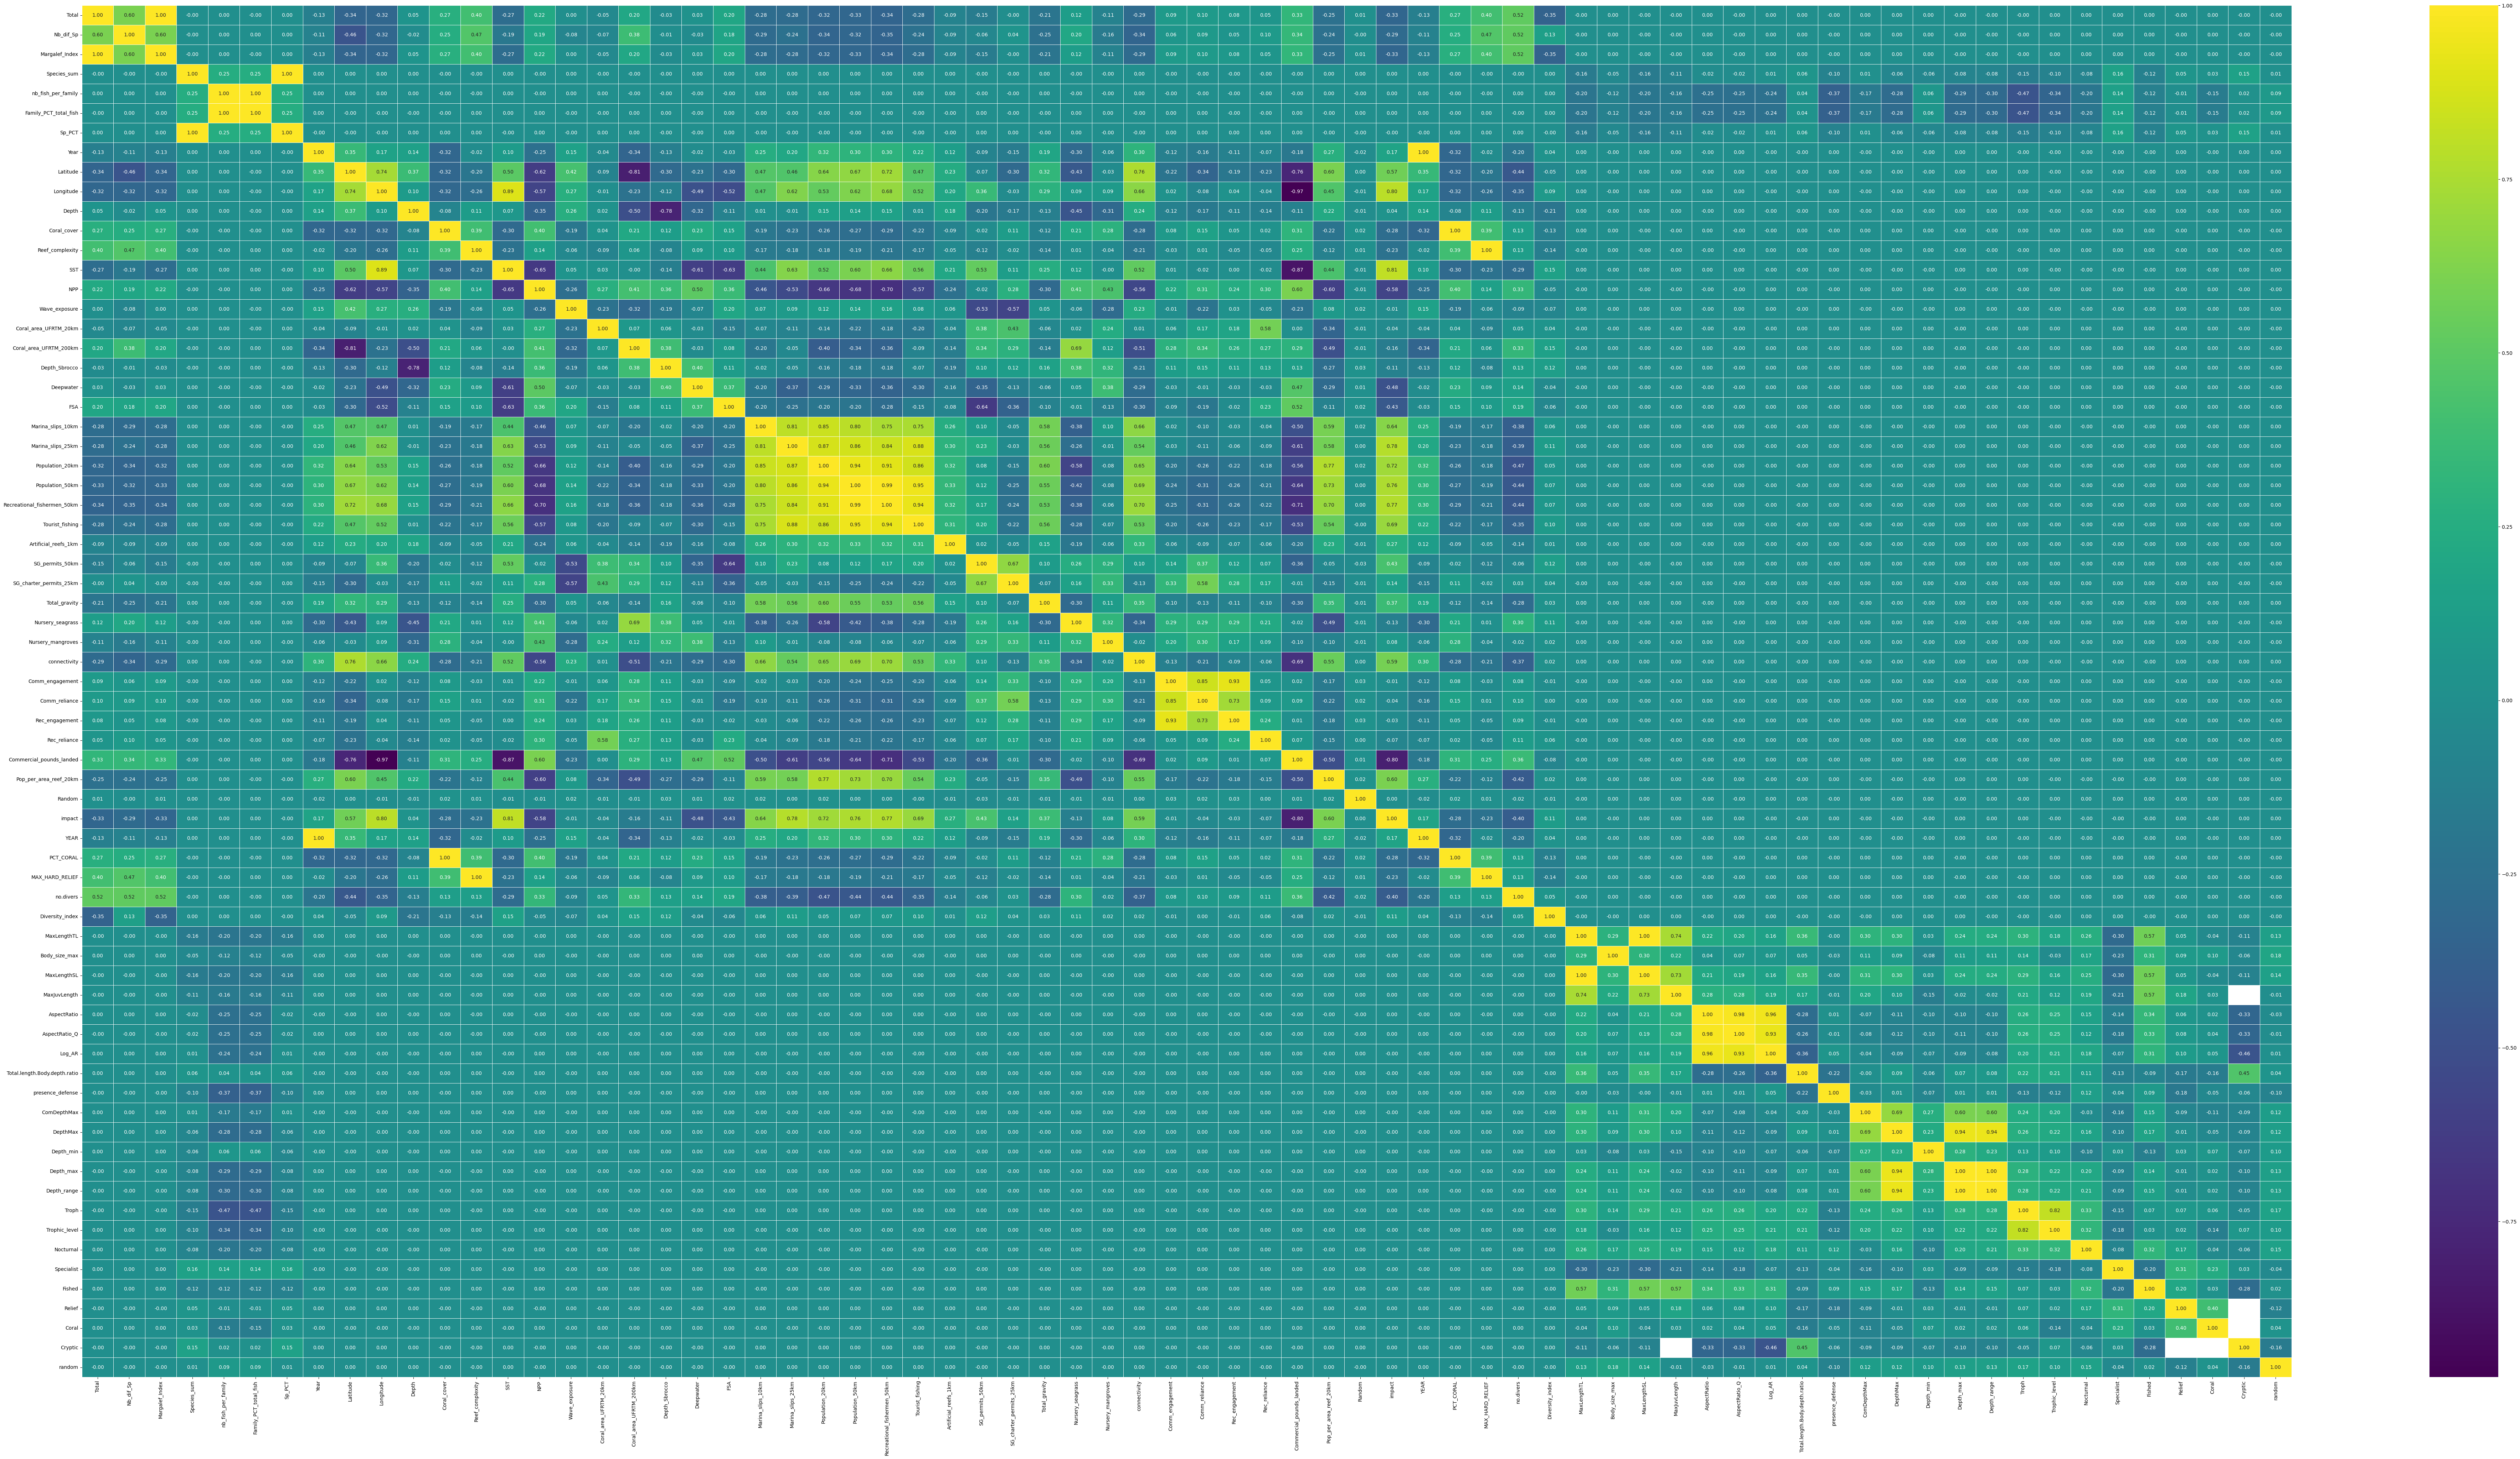

In [ ]:
corr=numerical.corr()
plt.figure(figsize=(100,50))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", cbar=True,linewidths=.5)
plt.show()

This correlation matrix shows that, the diversity index is:
- negatively correlated with the margalef_index, Depth, coral_cover and relief complexity
- positively correlated with Nb_dif_Sp, impact, Nursery seagrass, SG permmit, Tourist fishing, Marina slip 25 km, Depth Sbrocco, Coral cover UFRTM 20 km, SST
Than we study the relation of these variable with the other variable in the dataset
We can observed that the variables: Marina_slip_10km, MArina_slip_25km, population_20km, population_50km, recreational_fishing, tourist_fishing, commercial_pound_landed, coral_cover, releif_complexity, NPP, pop_per_aera_20km, impact, connectivity, SST, Species_sum, Coral_aera_UFRTM_200km, Depth_Sbrocco, Deepwater, FSA, MaxlengthTL, MaxlengthSL, MaxjuvLength, Body_size_max, Aspect_ratio, Fished

The index created (Nb_dif_Sp, Margalef_Index, Species_sum, nb_fish_per_family, Family_PCT_total_fish, Sp_PCT) only the Nb_dif_Sp, Margalef_Index seems to have relation with others features in the dataset. They will be includ in the reduce correlation matrix.

All of those index was created with excel by looping ovre the different table (specabund and trait_combined_2013) to realized:
 - Nb_dif_Sp: the number of different species observed by sites
 - Margalef_index: the ratio between the number of species observed in the site - 1 and the nepirian log of the total number of species observed in the study. From here: Bonjoru et al, 2019 IOSR Journal of Environmental Science, Toxicology and Food Technology(https://www.researchgate.net/publication/340363722_Diversity_and_Abundance_of_Fish_Species_in_Some_Selected_Riverine_Wetlands_of_Upper_Benue_River_Basin_Nigeria). 
 - Species_sum: the total number of fish observed for a species
 - nb_fish_per_family: total number of fish observed in the study for the family
 - Family_PCT_total_fish: the ratio between the nb_fish_per_family and the total number of fish in the study
 - Sp_PCT; the ratio between the number of fish in the species over the total  number of fish in the study.

We do a reducing correlation matrix only with those variables.

In [ ]:
Focus_corr = species_trait_4.loc[:, ['Marina_slips_10km', 'Marina_slips_25km', 'Population_20km', 'Population_50km', 'Recreational_fishermen_50km', 'Tourist_fishing', 'Commercial_pounds_landed','Coral_cover', 'Reef_complexity',
                           'NPP', 'Pop_per_area_reef_20km', 'impact', 'connectivity', 'SST', 'Nb_dif_Sp', 'Margalef_Index', 'Coral_area_UFRTM_200km', 'Depth_Sbrocco', 'Deepwater', 'FSA', 'MaxLengthTL', 'MaxLengthSL','MaxJuvLength', 
                          'Body_size_max', 'AspectRatio', 'Fished', 'SG_permits_50km', 'Random','Diversity_index']]

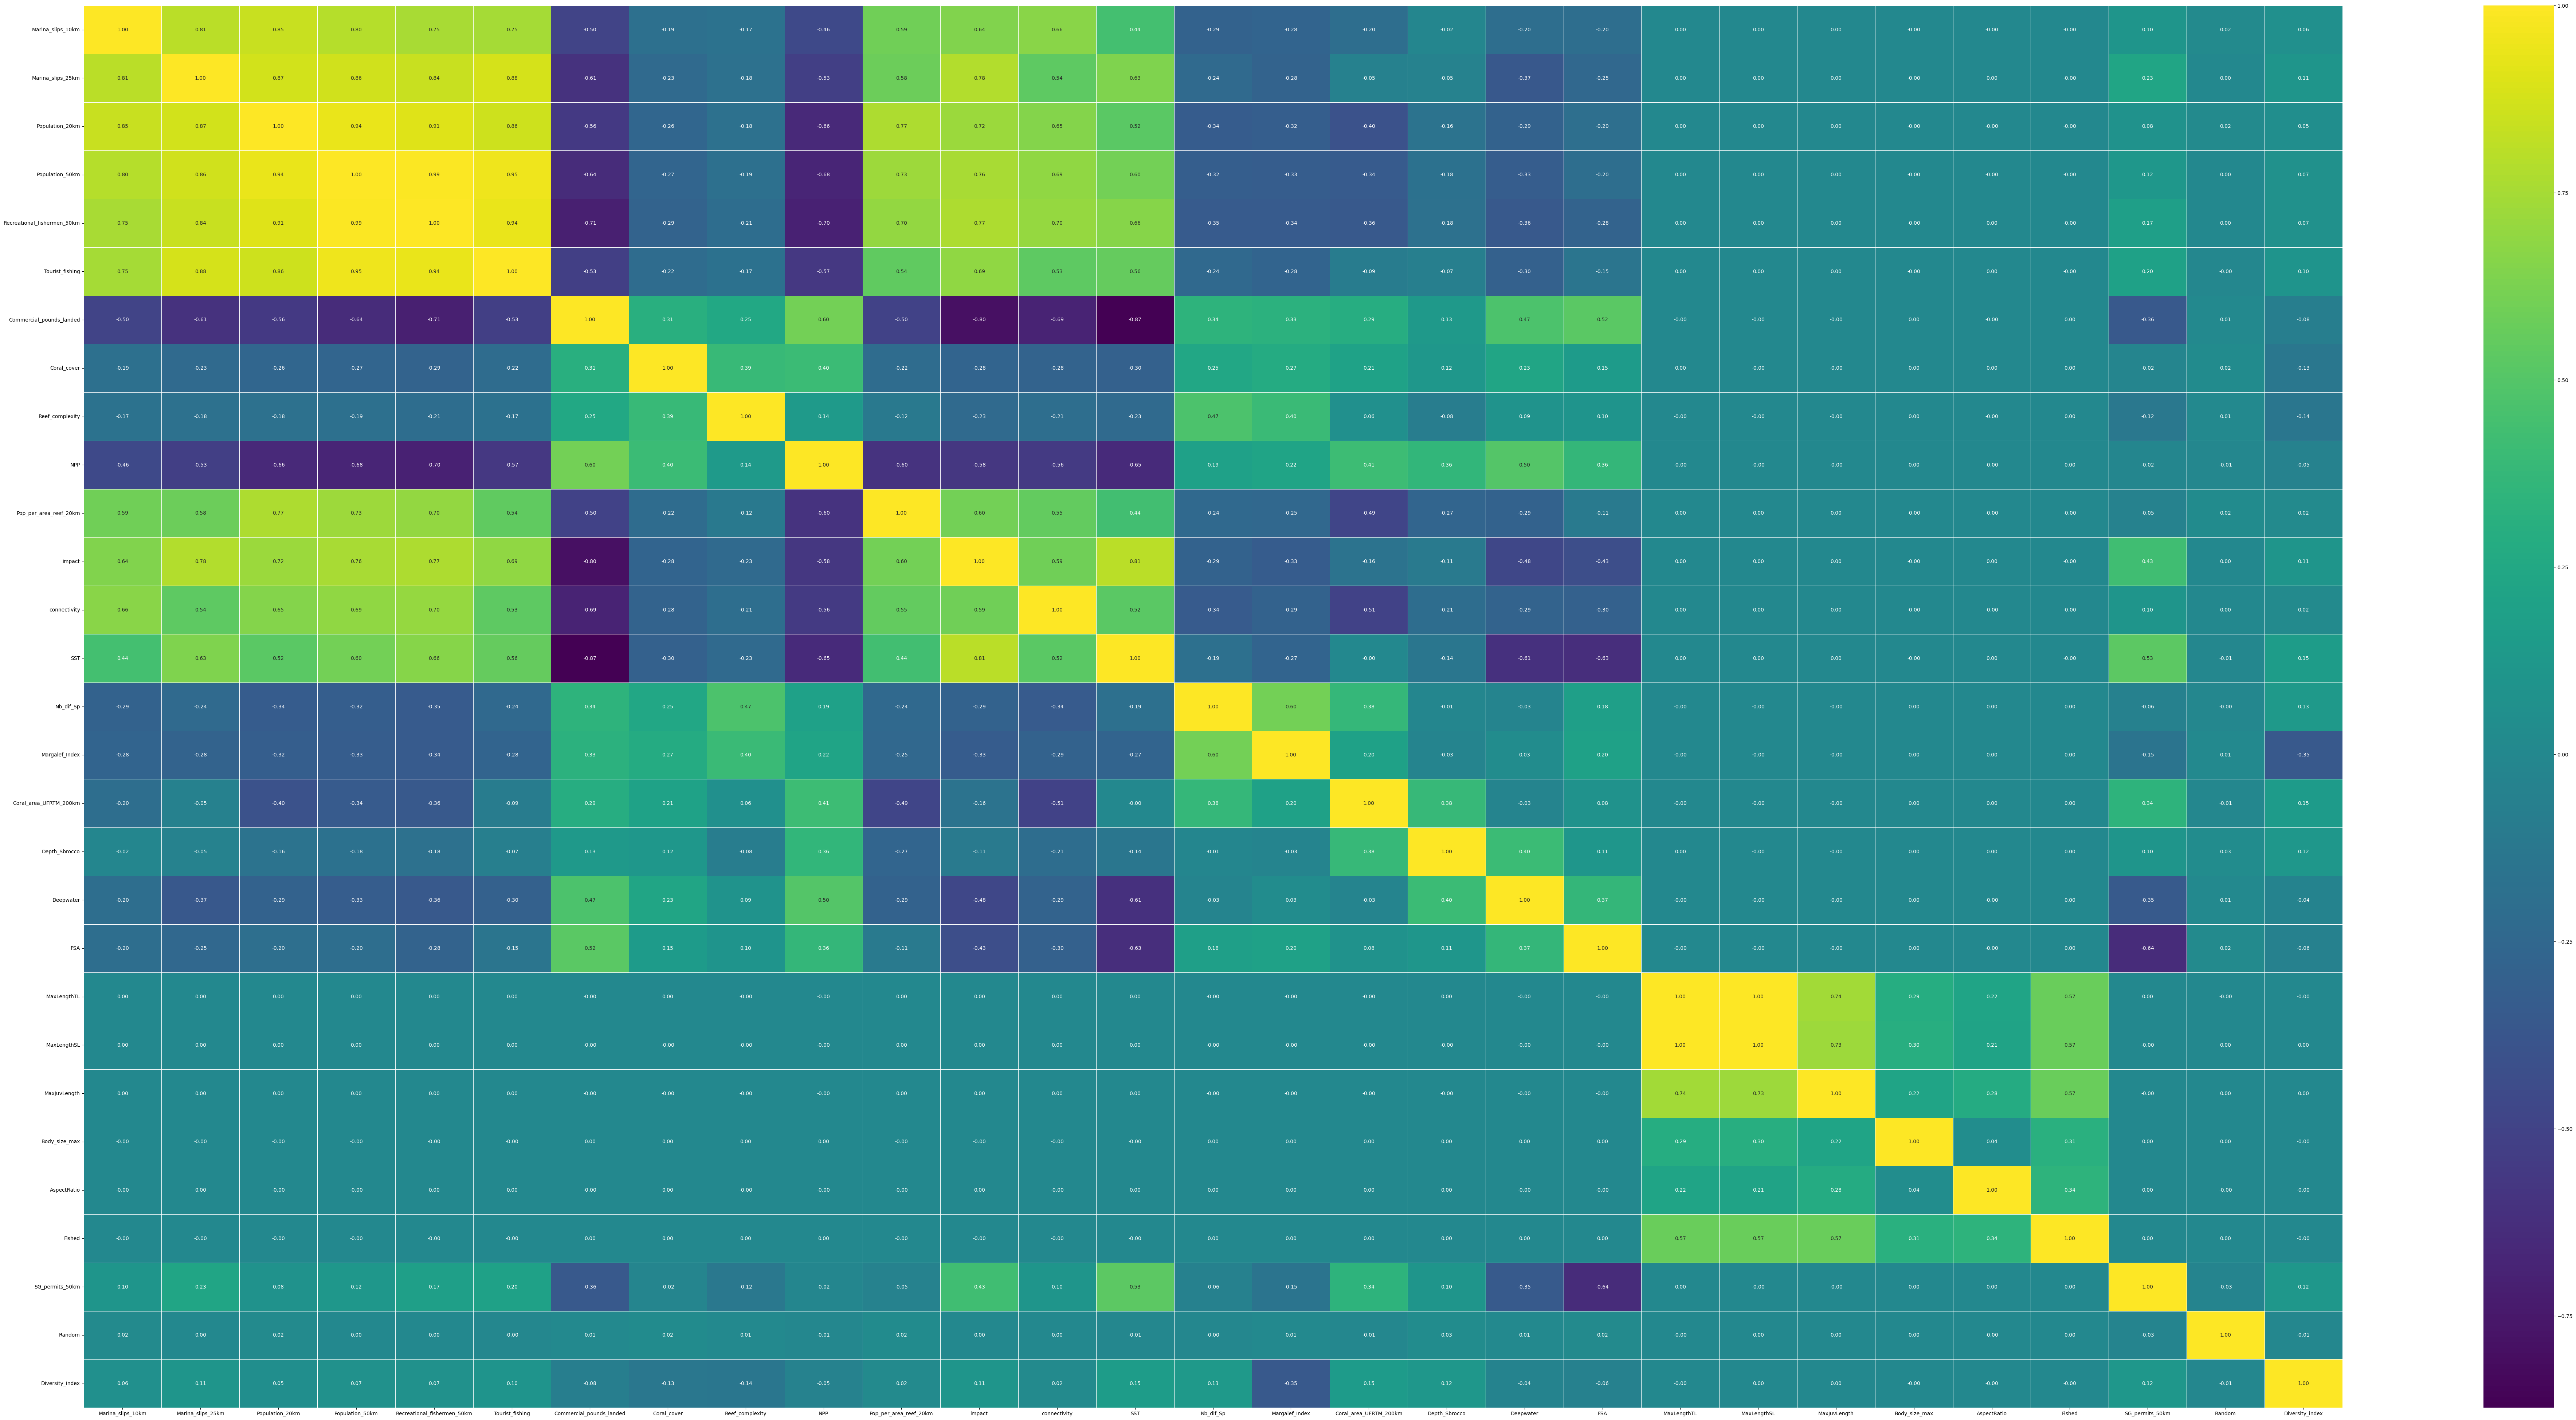

In [ ]:
corr2=Focus_corr.corr()
plt.figure(figsize=(100,50))
sns.heatmap(corr2, cmap='viridis', annot=True, fmt=".2f", cbar=True,linewidths=.5)
plt.show()

This reduced correlation matrix shows the high correlation between those variables. Perhaps we don't see correlation between the trait variable and the species variables. Only the diversity index shows correlation with all of those. 
It's for this reason we will used all of those variable for predicting the diversity index or the coral_cover/reef_complexity.

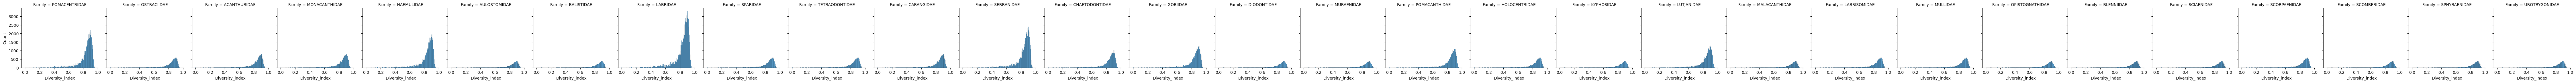

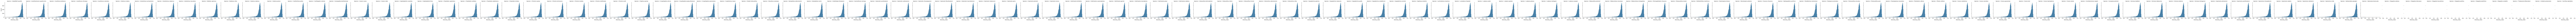

In [ ]:
#Plot the family and the species against the diversity index
g = sns.FacetGrid(data=species_trait_4,col="Family")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

h = sns.FacetGrid(data=species_trait_4,col="Species")
h.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

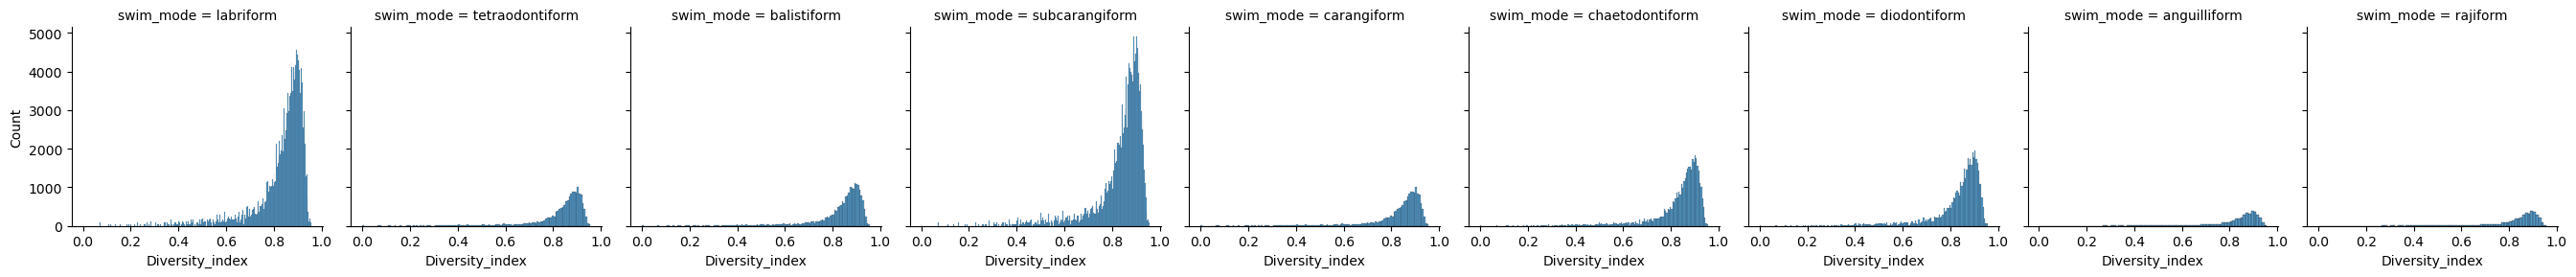

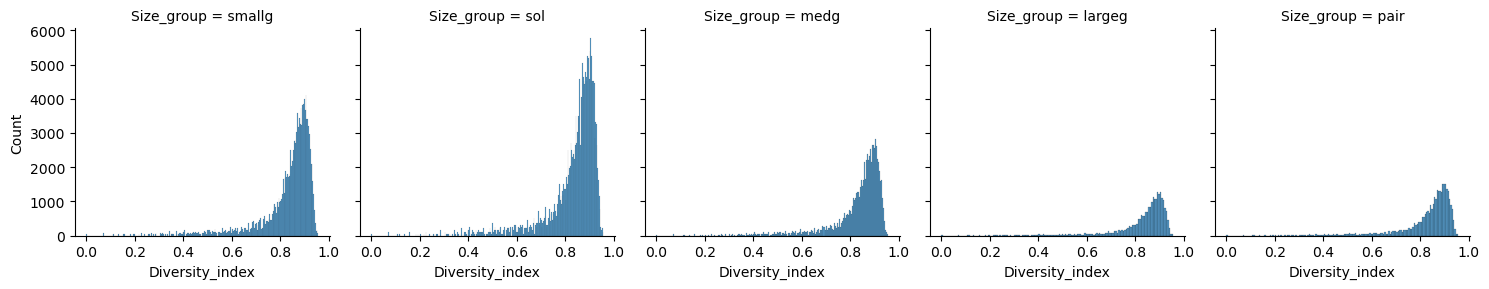

In [ ]:
#Plot the swim_mode and size_group against the diversity index
g = sns.FacetGrid(data=species_trait_4,col="swim_mode")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

h = sns.FacetGrid(data=species_trait_4,col="Size_group")
h.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()


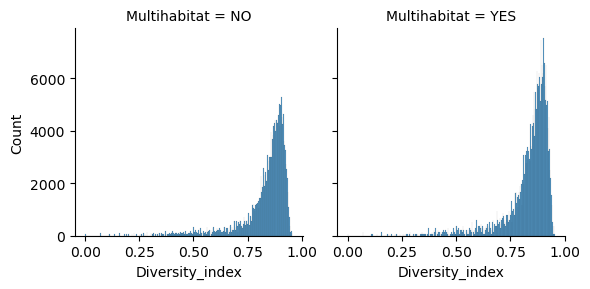

In [ ]:
#comparison of the Multihabitat and the diversity index
g = sns.FacetGrid(data=species_trait_4,col="Multihabitat")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

## To conclude, 

Merged the trait and species table allow to see correlation between the diversity index and Marina_slips_10km, Marina_slips_25km, Population_20km, Population_50km, Recreational_fishermen_50km, Tourist_fishing, Commercial_pounds_landed,Coral_cover, Reef_complexity, NPP, Pop_per_area_reef_20km, impact, connectivity, SST, Nb_dif_Sp, Margalef_Index, Coral_area_UFRTM_200km, Depth_Sbrocco, Deepwater, FSA, MaxLengthTL, MaxLengthSL,MaxJuvLength, Body_size_max, AspectRatio, Fished, SG_permits_50km. 
Also, we observed the swim_mode, size_group, and Multihabitat chose different pattern of diverity index in function of their categories. From the species table the region seems to influence the diversity index. 

All the variable cited above will be kept to try a first model to predict the diversity index. The dataset species_trait_ML wil contain them and used for training model and predict the diversity index.


In [ ]:
species_trait_ML = species_trait_4.loc[:,['Marina_slips_10km', 'Marina_slips_25km', 'Population_20km', 'Population_50km', 'Recreational_fishermen_50km', 'Tourist_fishing', 'Commercial_pounds_landed','Coral_cover', 'Reef_complexity',
                           'NPP', 'Pop_per_area_reef_20km', 'impact', 'connectivity', 'SST', 'Nb_dif_Sp', 'Margalef_Index', 'Coral_area_UFRTM_200km', 'Depth_Sbrocco', 'Deepwater', 'FSA', 'MaxLengthTL', 'MaxLengthSL','MaxJuvLength', 
                          'Body_size_max', 'AspectRatio', 'Fished', 'SG_permits_50km', 'swim_mode','Size_group','Family','Region','Multihabitat','Diversity_index']]